# ProblemStatment 2: Perform clustering (hierarchical,K means clustering and DBSCAN) for the airlines data to obtain optimum number of clusters. 
Draw the inferences from the clusters obtained.

Data Description:
 
The file EastWestAirlinescontains information on passengers who belong to an airline’s frequent flier program. For each passenger the data include information on their mileage history and on different ways they accrued or spent miles in the last year. The goal is to try to identify clusters of passengers that have similar characteristics for the purpose of targeting different segments for different types of mileage offers

ID --Unique ID

Balance--Number of miles eligible for award travel

Qual_mile--Number of miles counted as qualifying for Topflight status

cc1_miles -- Number of miles earned with freq. flyer credit card in the past 12 months:
cc2_miles -- Number of miles earned with Rewards credit card in the past 12 months:
cc3_miles -- Number of miles earned with Small Business credit card in the past 12 months:

1 = under 5,000
2 = 5,000 - 10,000
3 = 10,001 - 25,000
4 = 25,001 - 50,000
5 = over 50,000

Bonus_miles--Number of miles earned from non-flight bonus transactions in the past 12 months

Bonus_trans--Number of non-flight bonus transactions in the past 12 months

Flight_miles_12mo--Number of flight miles in the past 12 months

Flight_trans_12--Number of flight transactions in the past 12 months

Days_since_enrolled--Number of days since enrolled in flier program

Award--whether that person had award flight (free flight) or not


In [20]:
import pandas as pd
import numpy as np
from sklearn.cluster import AgglomerativeClustering,KMeans,DBSCAN
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import StandardScaler,normalize
import pandas_profiling as pp
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
airline = pd.read_excel('EastWestAirlines.xlsx',sheet_name='data')
airline

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [4]:
airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [5]:
report = pp.ProfileReport(airline)
report.to_widgets()

In [8]:
airline = airline.rename(columns={'Award?':'Award','ID#':'ID'})
airline.head()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [12]:
airline = airline.set_index('ID')

In [13]:
airline.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
ID,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0
2,19244,0,1,1,1,215,2,0,0,6968,0
3,41354,0,1,1,1,4123,4,0,0,7034,0
4,14776,0,1,1,1,500,1,0,0,6952,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [14]:
(airline == 0).sum()

Balance                 1
Qual_miles           3773
cc1_miles               0
cc2_miles               0
cc3_miles               0
Bonus_miles           475
Bonus_trans           475
Flight_miles_12mo    2723
Flight_trans_12      2723
Days_since_enroll       0
Award                2518
dtype: int64

In [18]:
#Normalizing the data
col = airline.columns
airline_norm = pd.DataFrame(normalize(airline),columns=col)
airline_norm

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,0.970414,0.0,0.000034,0.000034,0.000034,0.006000,0.000034,0.000000,0.000000,0.241371,0.000000
1,0.940209,0.0,0.000049,0.000049,0.000049,0.010504,0.000098,0.000000,0.000000,0.340437,0.000000
2,0.981113,0.0,0.000024,0.000024,0.000024,0.097817,0.000095,0.000000,0.000000,0.166880,0.000000
3,0.904428,0.0,0.000061,0.000061,0.000061,0.030605,0.000061,0.000000,0.000000,0.425527,0.000000
4,0.912226,0.0,0.000037,0.000009,0.000009,0.404078,0.000243,0.019383,0.000037,0.064718,0.000009
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.905810,0.0,0.000049,0.000049,0.000049,0.417949,0.000196,0.009805,0.000049,0.068784,0.000049
3995,0.999649,0.0,0.000016,0.000016,0.000016,0.015231,0.000078,0.000000,0.000000,0.021659,0.000016
3996,0.944948,0.0,0.000039,0.000013,0.000013,0.326726,0.000103,0.000000,0.000000,0.018001,0.000013
3997,0.999592,0.0,0.000018,0.000018,0.000018,0.009104,0.000018,0.009104,0.000018,0.025509,0.000000


In [19]:
airline_norm.corr()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
Balance,1.000000,-0.011873,-0.317983,-0.223603,-0.222295,-0.685175,-0.305009,-0.108585,-0.090462,-0.484226,-0.386045
Qual_miles,-0.011873,1.000000,0.049184,0.050597,0.051138,-0.030101,-0.016379,0.039176,0.030007,-0.010862,0.007574
cc1_miles,-0.317983,0.049184,1.000000,0.972390,0.974467,0.086927,0.290760,-0.005332,0.011898,0.469196,0.147829
cc2_miles,-0.223603,0.050597,0.972390,1.000000,0.998323,-0.071880,0.259560,0.004069,0.020743,0.501551,0.110987
cc3_miles,-0.222295,0.051138,0.974467,0.998323,1.000000,-0.075311,0.254327,0.003859,0.020593,0.500751,0.108483
Bonus_miles,-0.685175,-0.030101,0.086927,-0.071880,-0.075311,1.000000,0.363969,0.102031,0.070406,-0.102244,0.287995
Bonus_trans,-0.305009,-0.016379,0.290760,0.259560,0.254327,0.363969,1.000000,0.212868,0.281122,0.257424,0.282311
Flight_miles_12mo,-0.108585,0.039176,-0.005332,0.004069,0.003859,0.102031,0.212868,1.000000,0.772029,0.037106,0.150156
Flight_trans_12,-0.090462,0.030007,0.011898,0.020743,0.020593,0.070406,0.281122,0.772029,1.000000,0.046294,0.114666
Days_since_enroll,-0.484226,-0.010862,0.469196,0.501551,0.500751,-0.102244,0.257424,0.037106,0.046294,1.000000,0.279150


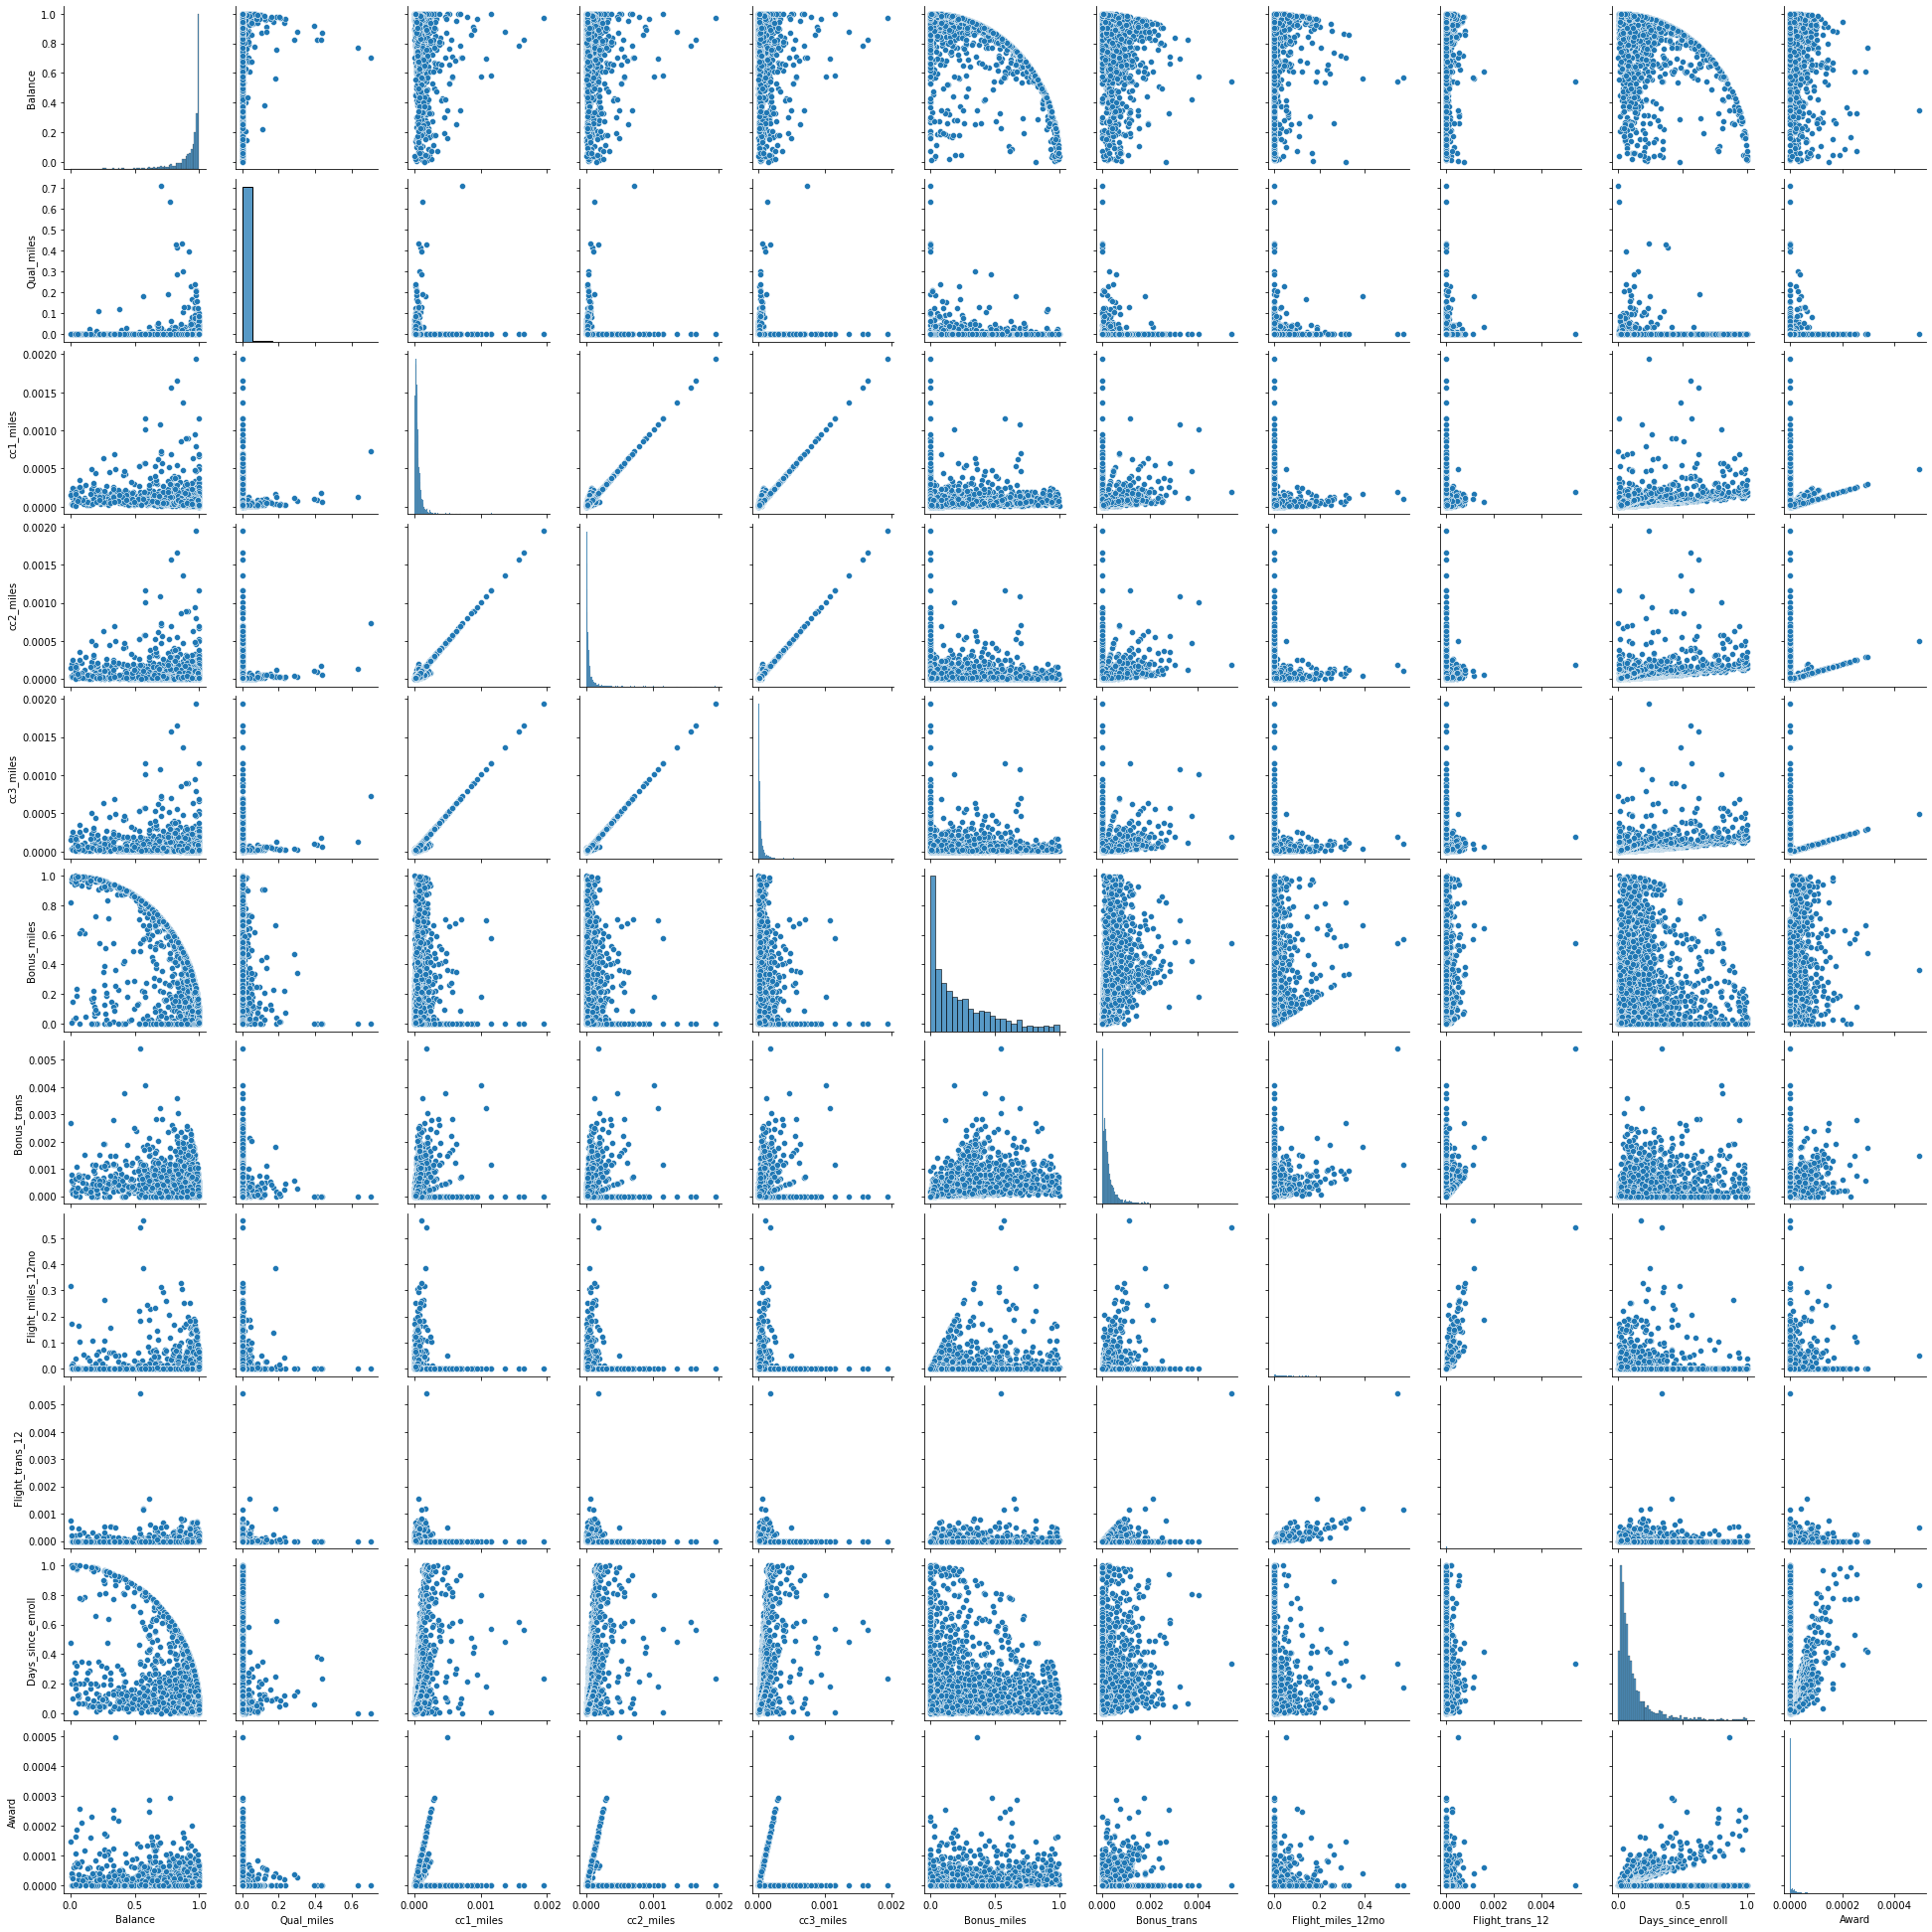

In [21]:
sns.pairplot(airline_norm)

## Hierarchical Clustering

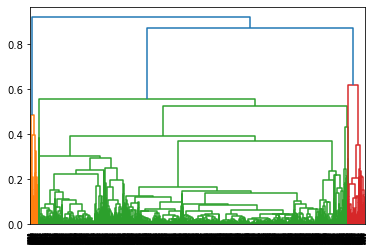

In [23]:
dend = sch.dendrogram(sch.linkage(airline_norm,method='centroid'))

In [28]:
clus =AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='average')

In [29]:
clus.fit(airline_norm)

AgglomerativeClustering(linkage='average', n_clusters=5)

In [30]:
clus.labels_

array([2, 2, 2, ..., 2, 2, 2], dtype=int64)

In [33]:
airline_df_hierachial= airline.copy()
airline_df_hierachial['Cluster'] = clus.labels_
airline_df_hierachial.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Cluster
ID,,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0,2
2,19244,0,1,1,1,215,2,0,0,6968,0,2
3,41354,0,1,1,1,4123,4,0,0,7034,0,2
4,14776,0,1,1,1,500,1,0,0,6952,0,2
5,97752,0,4,1,1,43300,26,2077,4,6935,1,2


In [35]:
airline_df_hierachial.Cluster.value_counts()

2    3651
3     202
1      87
0      58
4       1
Name: Cluster, dtype: int64

In [38]:
airline_df_hierachial.groupby('Cluster').agg('mean')

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
Cluster,,,,,,,,,,,
0,4931.310345,84.310345,1.189655,1.051724,1.000000,5033.017241,9.224138,793.172414,2.482759,4373.120690,0.637931
1,2364.827586,0.000000,1.000000,1.000000,1.000000,394.413793,2.034483,27.586207,0.137931,4856.402299,0.126437
2,79175.229526,151.085456,2.018351,1.014243,1.008491,16013.185155,11.485620,447.798685,1.343194,4086.349493,0.336894
3,23619.752475,98.074257,3.514851,1.014851,1.089109,48348.420792,18.475248,764.009901,2.118812,4314.381188,1.000000
4,0.000000,0.000000,1.000000,1.000000,1.000000,5491.000000,18.000000,2116.000000,5.000000,3204.000000,1.000000


## DBSCAN

In [75]:
k = len(airline_norm.columns)+1#k>=D+1
dbscan = DBSCAN(eps=0.3,min_samples=k)
dbscan.fit(airline_norm)

DBSCAN(eps=0.3, min_samples=12)

In [76]:
airline_df_dbscan = airline.copy()
airline_df_dbscan['Cluster'] = dbscan.labels_
airline_df_dbscan.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Cluster
ID,,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0,0
2,19244,0,1,1,1,215,2,0,0,6968,0,0
3,41354,0,1,1,1,4123,4,0,0,7034,0,0
4,14776,0,1,1,1,500,1,0,0,6952,0,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1,0


In [77]:
airline_df_dbscan.Cluster.value_counts()

 0    3993
-1       6
Name: Cluster, dtype: int64

In [78]:
airline_df_dbscan[airline_df_dbscan.Cluster == -1]
#As DBScan acts as a outlier detection below are the list of ouliers
#But below datapoints seems to be valid we will not drop the data

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Cluster
ID,,,,,,,,,,,,
1576,8962,4481,1,1,1,0,0,0,0,4198,0,-1
2815,4653,2433,1,1,1,0,0,0,0,2094,0,-1
3018,0,0,1,1,1,5491,18,2116,5,3204,1,-1
3720,972,972,1,1,1,0,0,0,0,2,0,-1
3770,6015,4929,1,1,1,0,0,0,0,30,0,-1
3847,5500,0,1,1,1,5500,11,5500,11,1690,0,-1


## Kmeans

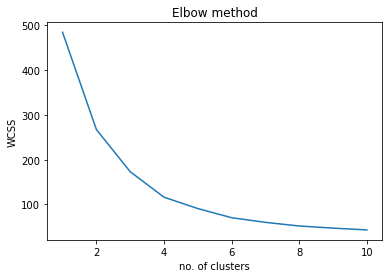

In [83]:
wcss=[]
for i in np.arange(1,11):
    kmen = KMeans(n_clusters=i,random_state=0)
    kmen.fit(airline_norm)
    wcss.append(kmen.inertia_)
plt.plot(np.arange(1,11),wcss)
plt.title('Elbow method')
plt.xlabel('no. of clusters')
plt.ylabel('WCSS')
plt.show()

In [84]:
#lets consider k =5 i.e no. of clusters is 5 . as after 5 the curve seams to have less slope which indicates that this point most homog datapoints form clsuter
cluster = KMeans(n_clusters=5,random_state=40)
cluster.fit(airline_norm)

KMeans(n_clusters=5, random_state=40)

In [85]:
pd.unique(cluster.labels_)

array([1, 3, 0, 2, 4])

In [87]:
airline_df_kmeans = airline.copy()
airline_df_kmeans['Cluster'] = cluster.labels_
airline_df_kmeans.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Cluster
ID,,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0,1
2,19244,0,1,1,1,215,2,0,0,6968,0,3
3,41354,0,1,1,1,4123,4,0,0,7034,0,1
4,14776,0,1,1,1,500,1,0,0,6952,0,3
5,97752,0,4,1,1,43300,26,2077,4,6935,1,0


In [88]:
airline_df_kmeans.groupby('Cluster').agg('mean')

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
Cluster,,,,,,,,,,,
0,70688.015873,115.891865,3.132937,1.025794,1.019841,32489.862103,17.608135,441.977183,1.309524,4044.158730,0.490079
1,97455.285047,185.672897,1.604206,1.009346,1.001869,9634.525701,9.705140,520.885981,1.566822,3961.256542,0.269626
2,27526.798295,115.818182,3.247159,1.034091,1.071023,41812.809659,17.599432,676.107955,1.951705,4226.252841,0.903409
3,11768.858247,55.121134,1.005155,1.000000,1.000000,984.778351,3.469072,93.216495,0.293814,4908.760309,0.172680
4,2415.576577,0.000000,1.009009,1.000000,1.000000,850.189189,3.036036,48.612613,0.171171,4723.225225,0.225225


In [89]:
cluster.cluster_centers_#list of centriod for each cluster

array([[8.92082888e-01, 1.99307200e-03, 5.79461422e-05, 3.00851971e-05,
        2.93767766e-05, 4.19998549e-01, 4.04213167e-04, 7.90618742e-03,
        2.31107226e-05, 8.30062143e-02, 1.00095767e-05],
       [9.87643287e-01, 3.39686766e-03, 3.51141444e-05, 3.04097798e-05,
        3.02956460e-05, 8.98546319e-02, 1.53537519e-04, 6.55527305e-03,
        2.07794557e-05, 7.53511744e-02, 3.94870378e-06],
       [5.14758999e-01, 2.45703304e-03, 9.55752981e-05, 5.00781670e-05,
        4.87710513e-05, 8.02358706e-01, 5.20472068e-04, 1.80244812e-02,
        6.06430623e-05, 1.36539353e-01, 3.06234744e-05],
       [8.93103634e-01, 4.45303855e-03, 1.23796982e-04, 1.23612826e-04,
        1.23612826e-04, 7.60122618e-02, 2.95169039e-04, 6.30476783e-03,
        2.07480658e-05, 4.07515394e-01, 1.35161631e-05],
       [4.14644791e-01, 1.30104261e-18, 2.28611980e-04, 2.27627266e-04,
        2.27627266e-04, 1.50766683e-01, 5.97513433e-04, 7.35401490e-03,
        2.84888383e-05, 8.48268382e-01, 3.91049405e-

In [92]:
airline_df_kmeans.Cluster.value_counts()

1    2140
0    1008
3     388
2     352
4     111
Name: Cluster, dtype: int64

In [93]:
airline_df_kmeans[airline_df_kmeans.Cluster == 2]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Cluster
ID,,,,,,,,,,,,
16,28495,0,4,1,1,49442,15,0,0,6912,1,2
17,51890,0,4,1,1,48963,16,0,0,6910,1,2
42,10470,0,4,1,1,38094,26,0,0,7840,1,2
59,38077,0,3,1,1,34024,8,0,0,6837,0,2
62,19918,0,1,1,1,17601,11,0,0,6863,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
3942,5000,0,1,1,1,5000,1,0,0,1537,0,2
3947,14775,0,1,1,1,14275,9,0,0,1519,0,2
3953,40424,0,4,1,1,44110,26,343,3,1523,1,2
